101 images to be resized.
101  images resized.
scissor images resizing completed
101 images to be resized.
101  images resized.
rock images resizing completed
101 images to be resized.
101  images resized.
paper images resizing completed
학습데이터(x_train)의 이미지 개수는 303 입니다.
x_train shape: (303, 28, 28, 3)
y_train shape: (303,)
label : 0


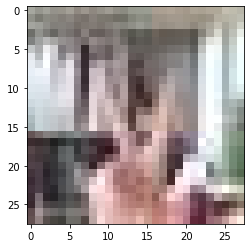

In [44]:
from PIL import Image
import os, glob
import numpy as np
import matplotlib.pyplot as plt


def resize_images(img_path) :
    images = glob.glob(img_path + '/*.jpg')
    
    print(len(images), "images to be resized.")
    
    target_size = (28,28)
    for img in images :
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), " images resized.")
    

def load_data(img_path, number_of_data,data_type):  
    # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위:0, 바위:1, 보:2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터("+data_type+")의 이미지 개수는", idx,"입니다.")
    return imgs, labels


scissor_img_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper/scissor"
resize_images(scissor_img_dir_path)
print("scissor images resizing completed")

rock_img_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper/rock"
resize_images(rock_img_dir_path)
print("rock images resizing completed")


paper_img_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper/paper"
resize_images(paper_img_dir_path)
print("paper images resizing completed")


image_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path, number_of_data = 303, data_type = 'x_train')
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

plt.imshow(x_train[0])
print('label :', y_train[0])

In [45]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1 = 303
n_channel_2 = 303
n_dense = 50

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
#3n_channel_1 : 얼마나 다양한 이미지의 특징을 살펴 볼 건지
#input_shape : 입력 이미지의 형태
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2 , (3,3), activation='relu'))
#n_channel_2 : 얼마나 다양한 이미지의 특징을 살펴 볼 건지
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
#n_dense : 분류가 알고리즘을 얼마나 복잡하게 할 것인지(복잡한 문제일수록 해당 수를 늘려보기)
model.add(keras.layers.Dense(3, activation='softmax'))
#3 : 여기서는 0~2까지 총 3개의 class를 구분하니까 3이 됨.

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs = 50)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 303)       8484      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 303)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 303)       826584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 303)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 7575)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 50)                378800    
_________________________________________________________________
dense_11 (Dense)             (None, 3)                

102 images to be resized.
102  images resized.
scissor test images resizing completed
101 images to be resized.
101  images resized.
rock test images resizing completed
102 images to be resized.
102  images resized.
paper test images resizing completed
학습데이터(x_test)의 이미지 개수는 305 입니다.
x_test shape: (305, 28, 28, 3)
y_test shape: (305,)
label : 0


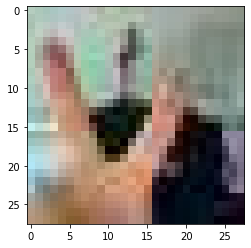

In [38]:
scissor_test_img_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper/test/scissor"
resize_images(scissor_test_img_dir_path)
print("scissor test images resizing completed")

rock_test_img_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper/test/rock"
resize_images(rock_test_img_dir_path)
print("rock test images resizing completed")

paper_test_img_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper/test/paper"
resize_images(paper_test_img_dir_path)
print("paper test images resizing completed")

test_image_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper/test"
(x_test, y_test)=load_data(test_image_dir_path, number_of_data = 305, data_type = 'x_test')
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

plt.imshow(x_test[0])
print('label :', y_test[0])

In [39]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 2.3437 - accuracy: 0.4623
test_loss: 2.343651533126831 
test_accuracy: 0.4622950851917267


111 images to be resized.
111  images resized.
scissor test images resizing completed
122 images to be resized.
122  images resized.
rock test images resizing completed
117 images to be resized.
117  images resized.
paper test images resizing completed
학습데이터(x_test_2)의 이미지 개수는 350 입니다.
x_test2 shape: (350, 28, 28, 3)
y_test2 shape: (350,)
label : 0


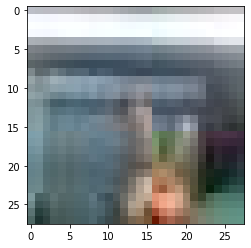

In [41]:
scissor_test2_img_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper/test1/scissor"
resize_images(scissor_test2_img_dir_path)
print("scissor test images resizing completed")

rock_test2_img_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper/test1/rock"
resize_images(rock_test2_img_dir_path)
print("rock test images resizing completed")

paper_test2_img_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper/test1/paper"
resize_images(paper_test2_img_dir_path)
print("paper test images resizing completed")

test2_image_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper/test1"
(x_test2, y_test2)=load_data(test2_image_dir_path, number_of_data = 350, data_type = 'x_test_2')
x_test2_norm = x_test2/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test2 shape: {}".format(x_test2.shape))
print("y_test2 shape: {}".format(y_test2.shape))

plt.imshow(x_test2[0])
print('label :', y_test2[0])

In [42]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test2_norm, y_test2, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

11/11 - 1s - loss: 3.7487 - accuracy: 0.3914
test_loss: 3.748676061630249 
test_accuracy: 0.39142856001853943


1427 images to be resized.
1427  images resized.
scissor test images resizing completed
1432 images to be resized.
1432  images resized.
rock test images resizing completed
1427 images to be resized.
1427  images resized.
paper test images resizing completed
학습데이터(x_test)의 이미지 개수는 4286 입니다.
x_test shape: (4286, 28, 28, 3)
y_test shape: (4286,)
label : 0


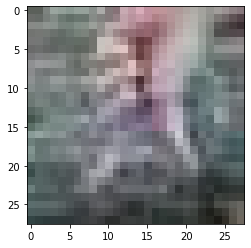

In [47]:
scissor_test_img_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper/TEST/scissor"
resize_images(scissor_test_img_dir_path)
print("scissor test images resizing completed")

rock_test_img_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper/TEST/rock"
resize_images(rock_test_img_dir_path)
print("rock test images resizing completed")

paper_test_img_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper/TEST/paper"
resize_images(paper_test_img_dir_path)
print("paper test images resizing completed")

test_image_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper/TEST"
(x_test, y_test)=load_data(test_image_dir_path, number_of_data = 4286, data_type = 'x_test')
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

plt.imshow(x_test[0])
print('label :', y_test[0])

In [48]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

134/134 - 1s - loss: 5.3140 - accuracy: 0.3474
test_loss: 5.313973903656006 
test_accuracy: 0.3474101722240448


1427 images to be resized.
1427  images resized.
scissor images resizing completed
1432 images to be resized.
1432  images resized.
rock images resizing completed
1427 images to be resized.
1427  images resized.
paper images resizing completed
학습데이터(x_train)의 이미지 개수는 4286 입니다.
x_train shape: (4286, 28, 28, 3)
y_train shape: (4286,)
label : 0


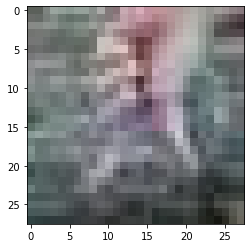

In [50]:
scissor_img_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper/TEST/scissor"
resize_images(scissor_img_dir_path)
print("scissor images resizing completed")

rock_img_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper/TEST/rock"
resize_images(rock_img_dir_path)
print("rock images resizing completed")


paper_img_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper/TEST/paper"
resize_images(paper_img_dir_path)
print("paper images resizing completed")


image_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper/TEST"
(x_train, y_train)=load_data(image_dir_path, number_of_data = 4286, data_type = 'x_train')
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

plt.imshow(x_train[0])
print('label :', y_train[0])

label : 1


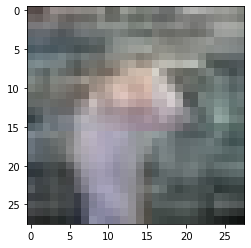

In [53]:
plt.imshow(x_train[2000])
print('label :', y_train[2000])

In [55]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1 = 4286
n_channel_2 = 4286
n_dense = 50

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
#3n_channel_1 : 얼마나 다양한 이미지의 특징을 살펴 볼 건지
#input_shape : 입력 이미지의 형태
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2 , (3,3), activation='relu'))
#n_channel_2 : 얼마나 다양한 이미지의 특징을 살펴 볼 건지
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
#n_dense : 분류가 알고리즘을 얼마나 복잡하게 할 것인지(복잡한 문제일수록 해당 수를 늘려보기)
model.add(keras.layers.Dense(3, activation='softmax'))
#3 : 여기서는 0~2까지 총 3개의 class를 구분하니까 3이 됨.

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs = 10)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 4286)      120008    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 4286)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 4286)      165332450 
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 4286)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 107150)            0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)                5357550   
_________________________________________________________________
dense_15 (Dense)             (None, 3)                

101 images to be resized.
101  images resized.
scissor test images resizing completed
101 images to be resized.
101  images resized.
rock test images resizing completed
101 images to be resized.
101  images resized.
paper test images resizing completed
학습데이터(x_test)의 이미지 개수는 303 입니다.
x_test shape: (305, 28, 28, 3)
y_test shape: (305,)
label : 1


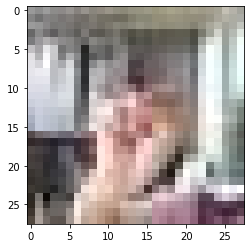

In [64]:
scissor_test_img_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper/scissor"
resize_images(scissor_test_img_dir_path)
print("scissor test images resizing completed")

rock_test_img_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper/rock"
resize_images(rock_test_img_dir_path)
print("rock test images resizing completed")

paper_test_img_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper/paper"
resize_images(paper_test_img_dir_path)
print("paper test images resizing completed")

test_image_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/rock_scissor_paper"
(x_test, y_test)=load_data(test_image_dir_path, number_of_data = 305, data_type = 'x_test')
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

plt.imshow(x_test[200])
print('label :', y_test[200])

In [65]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 10s - loss: 1.0986 - accuracy: 0.3311
test_loss: 1.0986335277557373 
test_accuracy: 0.33114755153656006
